In [1]:
# Objective: To explore the relationship between various medical and demographic factors among patients
#          : To predict lifestyle factors lead to patients developing diabetes
# As Dataset is highly imbalanced, AUC and F1 score is used to decide on the accuracy of the final prediction model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [8]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/diabetes_prediction_dataset.csv")

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
# to check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [16]:
len(df)

100000

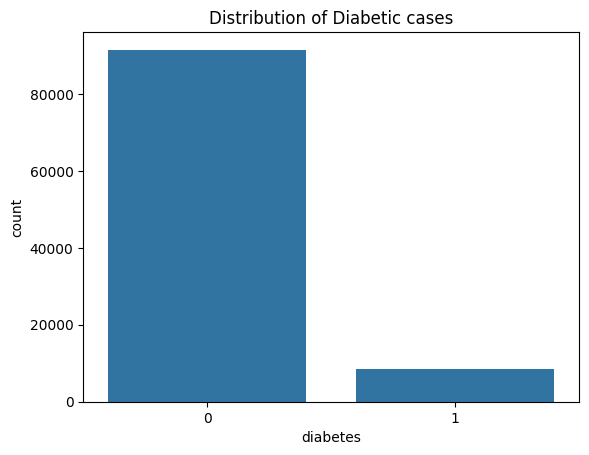

In [18]:
# to see count of postive (diabetic cases)
sns.countplot(data=df, x='diabetes')
plt.title("Distribution of Diabetic cases")
plt.show()

In [20]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [22]:
# 8.5% of patients have diabetes, dataset is imbalanced
100* df['diabetes'].value_counts()/len(df)

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

In [24]:
# to check datatypes of variables
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [26]:
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

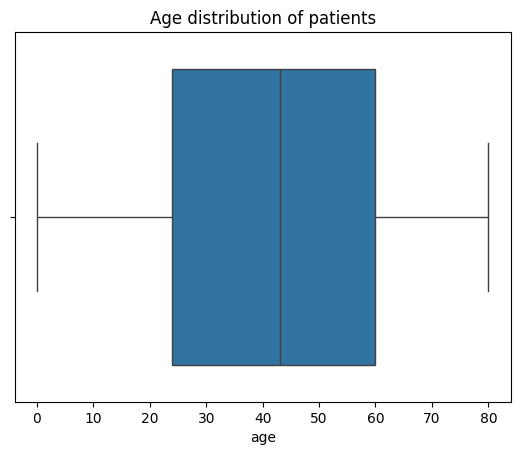

In [29]:
# average age of patient = 41 years
sns.boxplot(data=df, x='age')
plt.title("Age distribution of patients")
plt.show()

In [28]:
# to split the years into different categories using DEF custom function
def age_categories(s):
    if 0 <= s <= 20:
        return "1 to 20"
    elif 21 <= s <= 35:
        return "21 to 35"
    elif 36 <= s <= 50:
        return "36 to 50"
    elif 51 <= s <= 65:
        return "51 to 65"
    elif 66 <= s:
        return "above 66"

In [30]:
# to apply custom function into a new variable
df['age_categories'] = df['age'].apply(age_categories)

In [32]:
# to display variables of new df
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_categories
0,Female,80.0,0,1,never,25.19,6.6,140,0,above 66
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51 to 65
2,Male,28.0,0,0,never,27.32,5.7,158,0,21 to 35
3,Female,36.0,0,0,current,23.45,5.0,155,0,36 to 50
4,Male,76.0,1,1,current,20.14,4.8,155,0,above 66


In [34]:
df['age_categories'].value_counts()

age_categories
36 to 50    21549
51 to 65    21029
1 to 20     20904
21 to 35    19084
above 66    17434
Name: count, dtype: int64

In [36]:
# to arrange in correct order
age_categories_order = ['1 to 20', 
                        '21 to 35', 
                        '36 to 50', 
                        '36 to 50', 
                        'above 66']

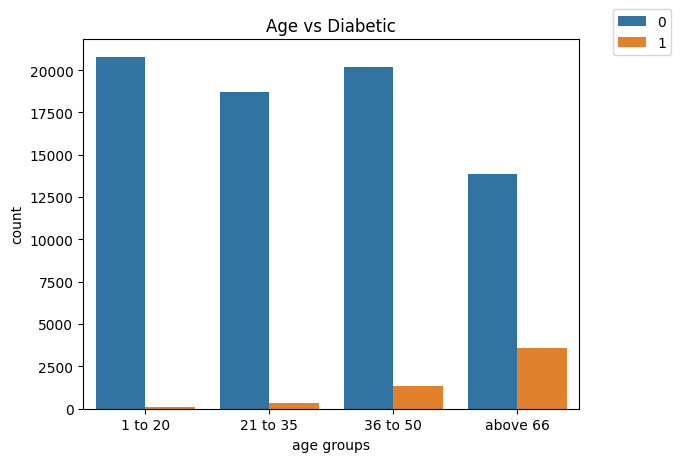

In [38]:
# Exploratory Data analysis
# Incidence of getting Diabetes increases with age
sns.countplot(data= df, x='age_categories', hue='diabetes', order = age_categories_order)
plt.title("Age vs Diabetic")
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("age groups")
plt.show()

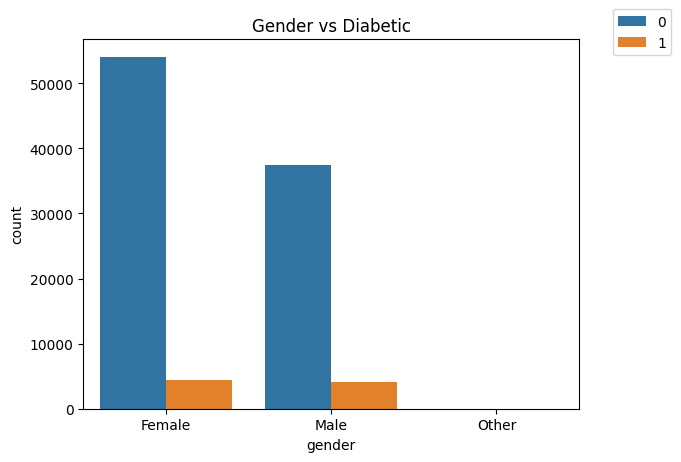

In [57]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Gender vs Diabetic")
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [40]:
# Females are more likely to get diabetes
pd.DataFrame(df.groupby(['gender','diabetes'])['diabetes'].count())

diabetes
gender diabetes          
Female 0            54091
       1             4461
Male   0            37391
       1             4039
Other  0               18

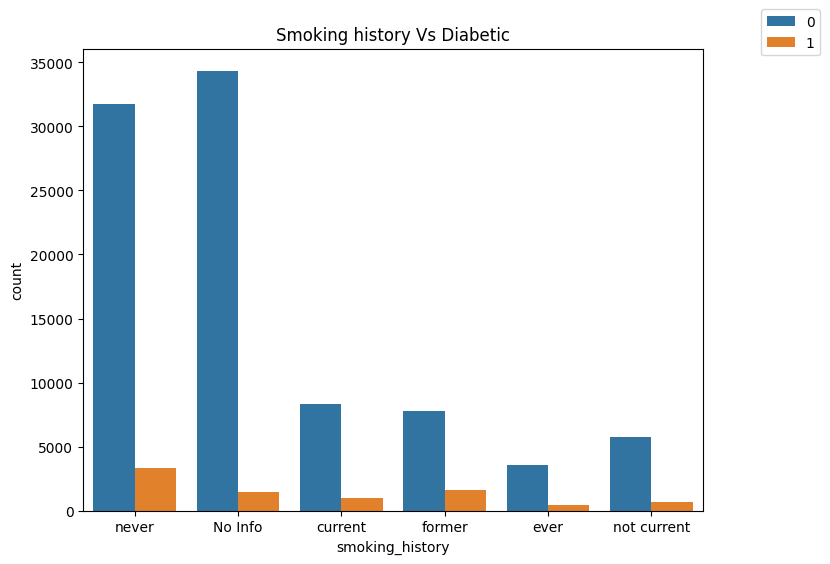

In [42]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title("Smoking history Vs Diabetic")
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

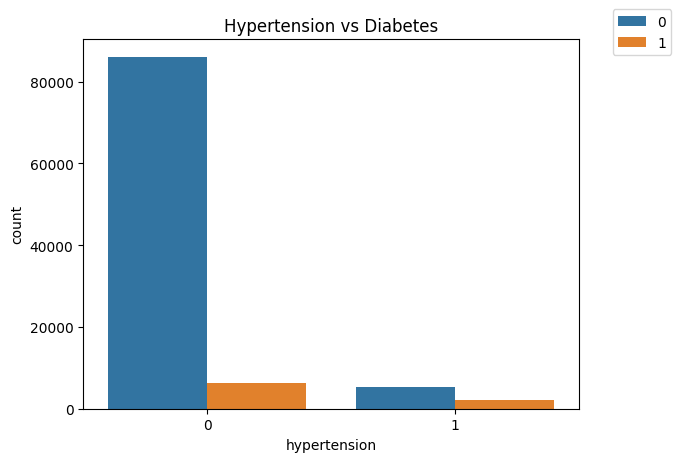

In [44]:
# Diabetic patients are likely non-hypertensive
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs Diabetes')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

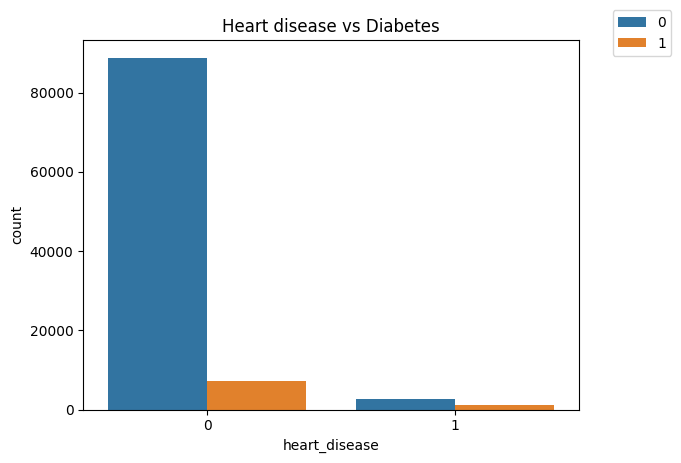

In [46]:
# Diabetic patients are not likely to suffer from heart disease
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart disease vs Diabetes')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [48]:
# to remove unimportant variables before machine learning algorithm
df = df.drop('age_categories', axis=1)

In [50]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [52]:
X = df.drop('diabetes', axis=1)

In [54]:
# to convert categorical variables in X into dummy variables before predictive modelling
X = pd.get_dummies(X, drop_first=True)

In [56]:
y = df['diabetes']

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)

In [68]:
scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [72]:
from xgboost import XGBClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
rf = RandomForestClassifier()

In [82]:
rf.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [83]:
# to predict on the X testing set
rf_pred = rf.predict(scaled_X_test)

In [84]:
# to print out prediction for the random forest model
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
rf_train_pred = rf.predict(scaled_X_train)

In [90]:
# to print predictions of the Random Forest training set
rf_train_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [94]:
# to compute confusion matrix for RF training set
rf_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
rf_train_cm

array([[9.99931662e-01, 6.83377525e-05],
       [8.63330407e-03, 9.91366696e-01]])

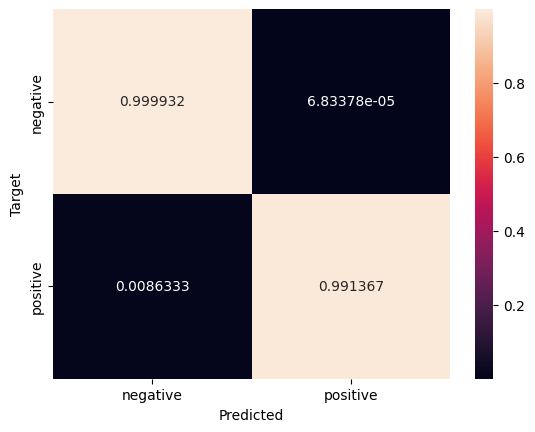

In [96]:
# to plot confusion matrix for Random Forest training set
def plot_cm(rf_train_cm):
    classes = ['negative','positive']
    df_rf_train_cm = pd.DataFrame(rf_train_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_rf_train_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(rf_train_cm)
plt.show()

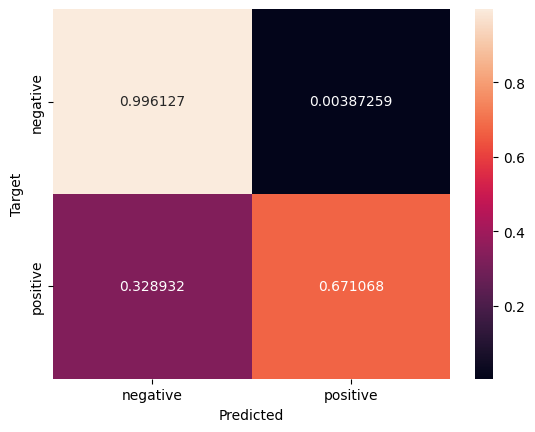

In [98]:
# to plot the confusion matrix for Random Forest Testing set
# accuracy rate for True Negative cases (Diabetes) = 99.56%
# accuracy rate for True positive cases = 66.68%
rf_test_cm = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(rf_test_cm)
plt.show()

In [100]:
print("RF train AUC:", roc_auc_score(y_train, rf_train_pred))
print("RF test AUC:", roc_auc_score(y_test, rf_pred))

RF train AUC: 0.9956491790897981
RF test AUC: 0.8335979204597733


In [129]:
# AUC score for Random Forest classifier = 0.833

In [102]:
print("RF train F1:", f1_score(y_train, rf_train_pred))
print("RF test F1:", f1_score(y_test, rf_pred)) 

RF train F1: 0.9952989569560746
RF test F1: 0.7831873905429072


In [104]:
print(classification_report(y_test,rf_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18334
           1       0.94      0.67      0.78      1666

    accuracy                           0.97     20000
   macro avg       0.96      0.83      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [106]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [108]:
ada.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [110]:
# to do prediction on the Adaboost train set
ada_train_pred = ada.predict(scaled_X_train)

In [112]:
# to print first 10 prediction of Adaboost training set
ada_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
# to predict on the X testing data
ada_pred = ada.predict(scaled_X_test)

In [116]:
ada_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
# Confusion matrix for AdaBoost train set
ada_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
ada_train_cm

array([[9.99931662e-01, 6.83377525e-05],
       [8.63330407e-03, 9.91366696e-01]])

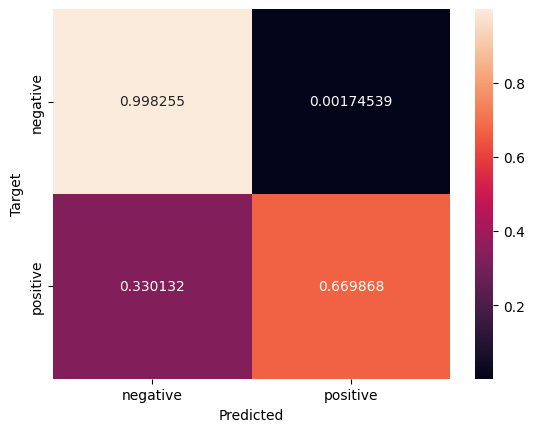

In [120]:
# to plot confusion matrix for AdaBoost testing set
# accuracy rate for Negative cases = 99.82%
# accuracy rate for Positive cases (diabetics) = 66.98%
ada_test_cm = confusion_matrix(y_test, ada_pred, normalize='true')
plot_cm(ada_test_cm)
plt.show()

In [122]:
# to compute the AUC score and F1 for AdaBoost model
print("Ada train AUC:", roc_auc_score(y_train, ada_train_pred))
print("Ada test AUC:", roc_auc_score(y_test, ada_pred))

Ada train AUC: 0.845632072852388
Ada test AUC: 0.8340612780510916


In [157]:
# AUC score for AdaBoost classifier test prediction score = 0.834

In [124]:
print("Ada train F1:", f1_score(y_train, ada_train_pred))
print("Ada test F1:", f1_score(y_test, ada_pred)) # F1 score AdaBoost classifier

Ada train F1: 0.811033064930615
Ada test F1: 0.7931769722814499


In [126]:
print(classification_report(y_test,ada_pred)) # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18334
           1       0.97      0.67      0.79      1666

    accuracy                           0.97     20000
   macro avg       0.97      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [128]:
gb = GradientBoostingClassifier()

In [130]:
gb.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [132]:
gb_pred = gb.predict(scaled_X_test)

In [134]:
gb_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
# to predict on the Gradient Boost training set
gb_train_pred = gb.predict(scaled_X_train)

In [140]:
gb_train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [146]:
# to compute the AUC and F1 score for Gradient Boost model
print("GB train AUC:", roc_auc_score(y_train, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.8426697402775817
GB test AUC: 0.8317965453880909


In [148]:
# AUC score for Gradient Boost classifier test set = 0.832

In [152]:
print("GB train F1:", f1_score(y_train, gb_train_pred))
print("GB test F1:", f1_score(y_test, gb_pred))  # F1 score for Gradient Boost classifier = 79.38%

GB train F1: 0.8104416976402454
GB test F1: 0.7938329150233059


In [154]:
print(classification_report(y_test,gb_pred)) # GB 97% accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18334
           1       0.99      0.66      0.79      1666

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [210]:
xg = XGBClassifier()

In [212]:
xg.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [214]:
# to predict on X test data, XGBoost classifier
xg_pred = xg.predict(scaled_X_test)

In [216]:
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [218]:
# to return predictions on the XGBoost train set
xg_train_pred = xg.predict(scaled_X_train)

In [220]:
xg_train_pred

array([0, 0, 1, ..., 0, 1, 0])

In [222]:
# to print XGBoost confusion matrix on train set
xg_train_cm = confusion_matrix(y_train, xg_train_pred, normalize='true')
xg_train_cm

array([[9.99207282e-01, 7.92717929e-04],
       [2.67486099e-01, 7.32513901e-01]])

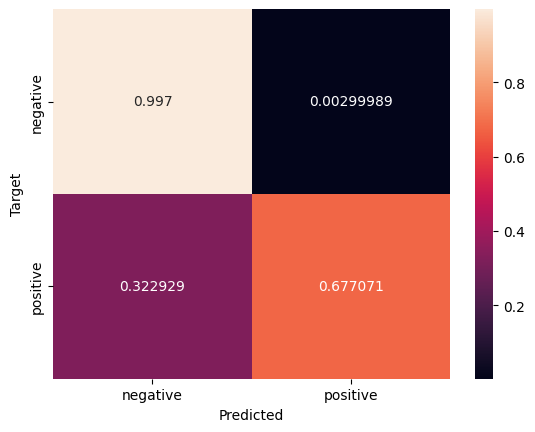

In [224]:
# to print XGBoost confusion matrix on testing set
# accuracy rate True negative cases = 99.7%
# accuracy rate True positive cases (Diabetics) = 67.7%
xg_test_cm = confusion_matrix(y_test, xg_pred, normalize='true')
plot_cm(xg_test_cm)
plt.show()

In [228]:
# to compute the AUC and F1 score for XGBoost classifier model
print("XGB train AUC:", roc_auc_score(y_train, xg_train_pred))
print("XGB test AUC:", roc_auc_score(y_test, xg_pred))

XGB train AUC: 0.8658605915768642
XGB test AUC: 0.8370354687091374


In [178]:
# AUC score XGBoost Classifier test model = 0.837

In [230]:
print("XGB train F1:", f1_score(y_train, xg_train_pred))
print("XGB test F1:", f1_score(y_test, xg_pred)) # F1 score XGBoost test modle = 79.18%

XGB train F1: 0.8414859640275677
XGB test F1: 0.7918567918567918


In [184]:
print(classification_report(y_test,xg_pred)) # XGBoost 97% accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18334
           1       0.95      0.68      0.79      1666

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [232]:
dt = DecisionTreeClassifier()

In [234]:
dt.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [236]:
dt_pred = dt.predict(scaled_X_test)

In [238]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [240]:
# to do prediction on X train set: Decision Tree
dt_train_pred = dt.predict(scaled_X_train)

In [242]:
dt_train_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [244]:
# to compute the confusion matrix on Decision tree train set
dt_train_cm = confusion_matrix(y_train, dt_train_pred, normalize='true')
dt_train_cm

array([[1.        , 0.        ],
       [0.00907229, 0.99092771]])

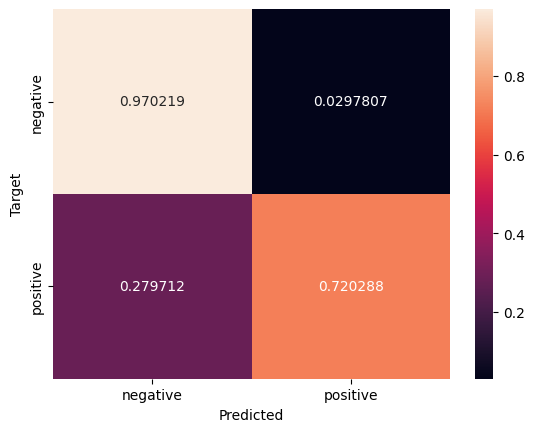

In [246]:
# to plot the confusion tree matrix for Decision Tree testing set
# accuracy rate Negative cases = 97%
# accuracy rate Positive cases (Diabetics) = 72.08%
dt_test_cm = confusion_matrix(y_test, dt_pred, normalize='true')
plot_cm(dt_test_cm)
plt.show()

In [252]:
# to print the AUC score and F1 score for Decision Tree prediction model
print("DT train AUC:", roc_auc_score(y_train, dt_train_pred))
print("DT test AUC:", roc_auc_score(y_test, dt_pred))

DT train AUC: 0.9954638571846649
DT test AUC: 0.8452536900000538


In [ ]:
# AUC score for Decision tree  test model = 0.845

In [254]:
print("DT train F1:", f1_score(y_train, dt_train_pred))
print("DT test F1:", f1_score(y_test, dt_pred)) # F1 score for Decision tree 

DT train F1: 0.99544318682934
DT test F1: 0.7033997655334114


In [250]:
print(classification_report(y_test,dt_pred)) # Decision Tree 95% accuracy

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18334
           1       0.69      0.72      0.70      1666

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [256]:
## XGBoost classifier tes model has the highest AUC score at 0.837

In [266]:
xg.feature_importances_

array([0.0310883 , 0.04018271, 0.03840176, 0.01841853, 0.53518146,
       0.25660625, 0.01401422, 0.        , 0.01288843, 0.01330143,
       0.01229135, 0.01285281, 0.01477262], dtype=float32)

In [264]:
pd.DataFrame(data = xg.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
HbA1c_level,0.535181
blood_glucose_level,0.256606
hypertension,0.040183
heart_disease,0.038402
age,0.031088
bmi,0.018419
smoking_history_not current,0.014773
gender_Male,0.014014
smoking_history_ever,0.013301
smoking_history_current,0.012888


In [268]:
# to read into a new data frame
xg_imp = pd.DataFrame(data = xg.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_18740\3574004671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xg_imp, y=xg_imp.index, x='Importance', palette='magma')


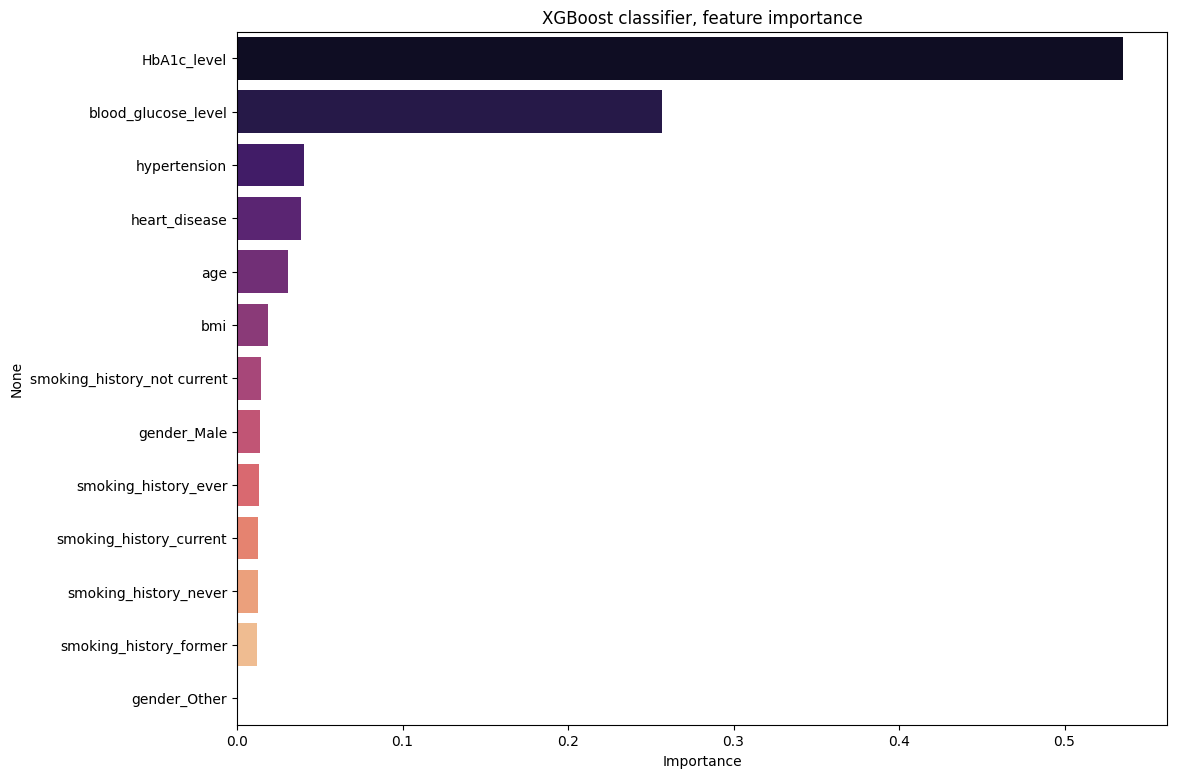

In [270]:
# Predictors for diabetic patients: 1)HbA1c level, 2) Blood glucose level, 3) Hypertension, 4) Heart disease
plt.figure(figsize=(12,9), dpi=100)
sns.barplot(data=xg_imp, y=xg_imp.index, x='Importance', palette='magma')
plt.title("XGBoost classifier, feature importance")
plt.show()